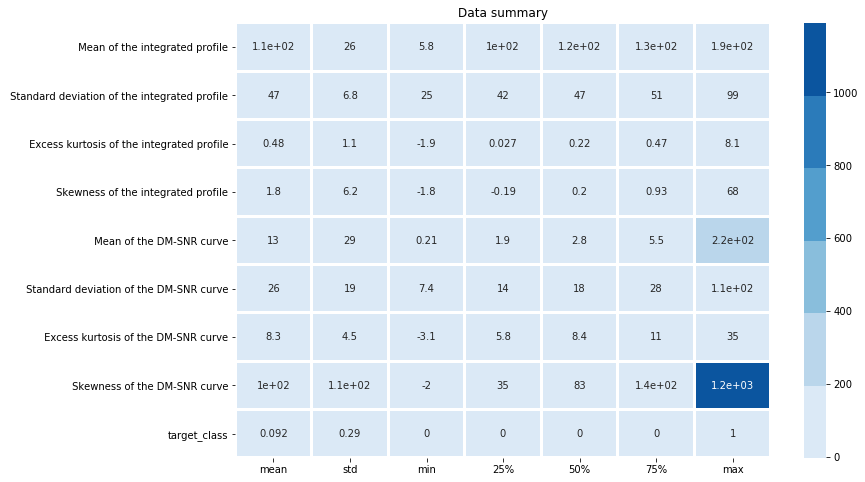

(17898, 9)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split

import os
#print(os.listdir("C:/Users/lap/Desktop/datasets_for_ML"))

df = pd.read_csv("C:/Users/lap/Desktop/datasets_for_ML/pulsar_stars.csv")
df.target_class.value_counts()
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
           annot = True, linecolor="w",
           linewidth=2,cmap=sns.color_palette("Blues"))
plt.title("Data summary")
plt.show()
df.shape

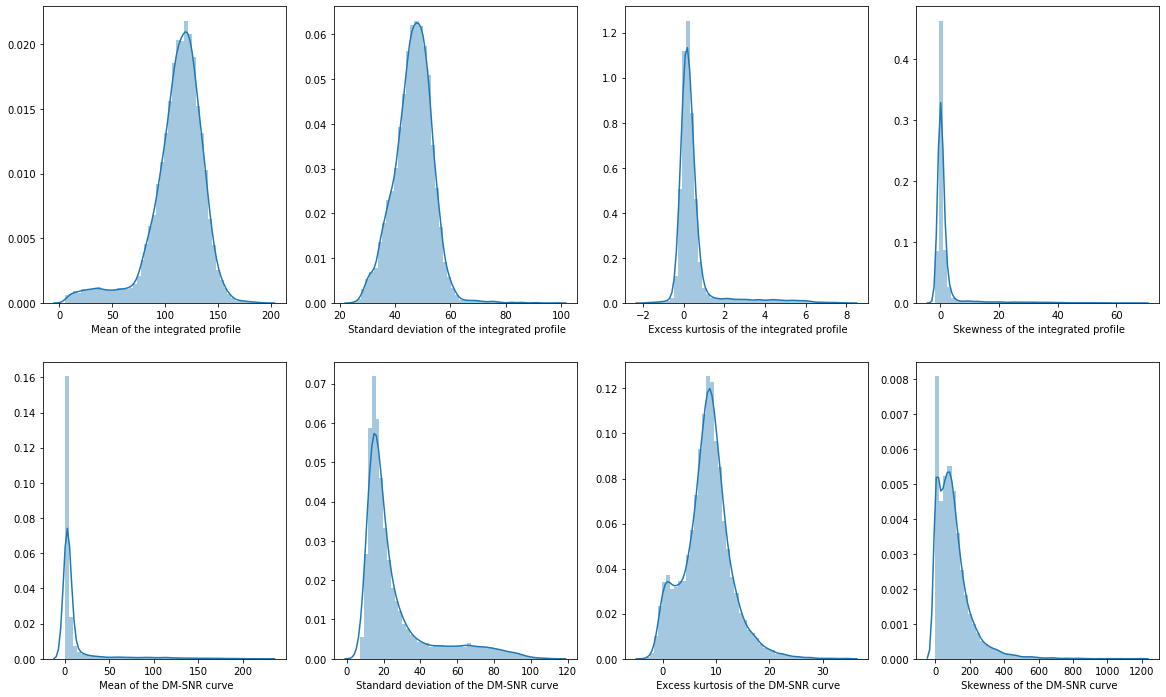

In [3]:
f, axes = plt.subplots(2,4, figsize=(20, 12))
sns.distplot( df[" Mean of the integrated profile"], ax=axes[0,0])
sns.distplot( df[" Standard deviation of the integrated profile"], ax=axes[0,1])
sns.distplot( df[" Excess kurtosis of the integrated profile"], ax=axes[0,2])
sns.distplot( df[" Skewness of the integrated profile"], ax=axes[0,3])
sns.distplot( df[" Mean of the DM-SNR curve"], ax=axes[1,0])
sns.distplot( df[" Standard deviation of the DM-SNR curve"], ax=axes[1,1])
sns.distplot( df[" Excess kurtosis of the DM-SNR curve"], ax=axes[1,2])
sns.distplot( df[" Skewness of the DM-SNR curve"], ax=axes[1,3])




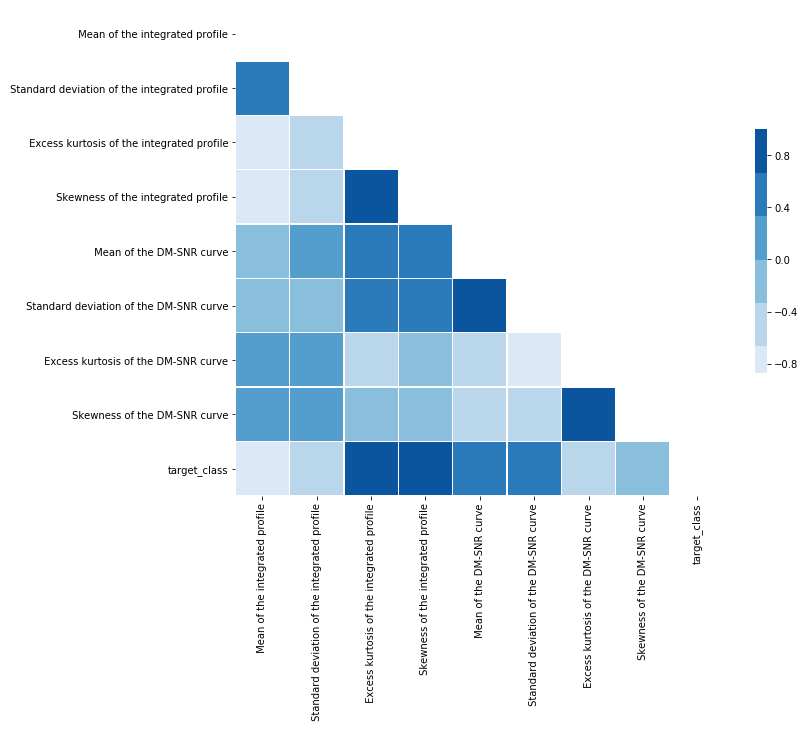

In [4]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize= (11,9))
cmap = sns.color_palette("Blues")

sns.heatmap(corr , mask=mask, cmap=cmap, vmax=1, center=0,
            square=True,linewidth=.5,cbar_kws= {"shrink": .5})

In [ ]:
sns.pairplot(df,hue="target_class")
plt.title("pair plot for variables")
plt.show()

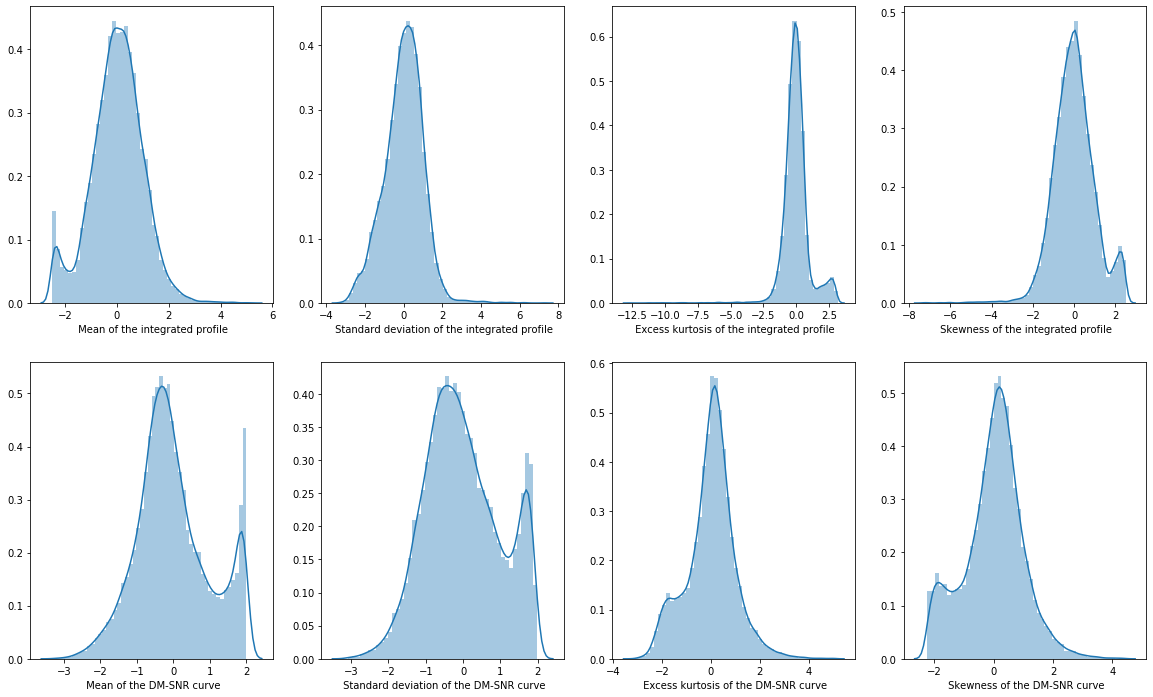

In [5]:
df_scale = df.copy()
columns = df.columns[:-1]
#print (columns)
df_scale[columns] = power_transform(df.iloc[:,0:8], method='yeo-johnson')
df_scale.head()
f, axes = plt.subplots(2,4, figsize=(20, 12))
sns.distplot( df_scale[" Mean of the integrated profile"], ax=axes[0,0])
sns.distplot( df_scale[" Standard deviation of the integrated profile"], ax=axes[0,1])
sns.distplot( df_scale[" Excess kurtosis of the integrated profile"], ax=axes[0,2])
sns.distplot( df_scale[" Skewness of the integrated profile"], ax=axes[0,3])
sns.distplot( df_scale[" Mean of the DM-SNR curve"], ax=axes[1,0])
sns.distplot( df_scale[" Standard deviation of the DM-SNR curve"], ax=axes[1,1])
sns.distplot( df_scale[" Excess kurtosis of the DM-SNR curve"], ax=axes[1,2])
sns.distplot( df_scale[" Skewness of the DM-SNR curve"], ax=axes[1,3])


In [9]:
X = df_scale.iloc[:, 0:8]
y = df_scale.iloc[:,-1]
#print (y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123, stratify=y)
print('X_train:',X_train.shape)

X_train: (14318, 8)


In [6]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma = 'scale')))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_l

In [11]:
results = []
names = []
seed = 123
scoring  = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,shuffle=True, random_state= seed)
    cv_results = model_selection.cross_val_score(model, X_train,y_train, cv=kfold,scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    #print(cv_results)
    print (msg)

LR: 0.979257 (0.001911)
LDA: 0.978628 (0.003183)
KNN: 0.976882 (0.002324)
CART: 0.965637 (0.003609)
SVM: 0.978279 (0.002303)


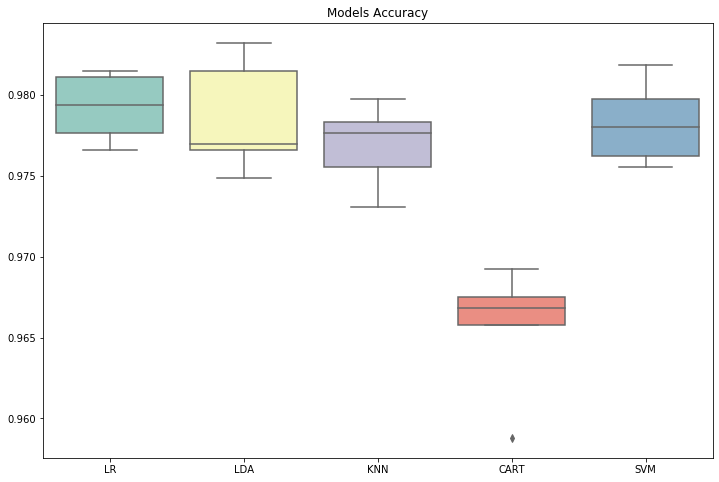

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x=names,  y=results, palette="Set3")
plt.title("Models Accuracy")
plt.show()

In [14]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth" : [3, None],
              "max_features": randint(1,9),
              "min_samples_leaf": randint(1,9),
              "criterion": ["gini","entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring=scoring)
tree_cv.fit(X_train,y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.9784884736290603


In [17]:
from sklearn.model_selection import cross_val_score

# Fit it to the data with new hyper-parameters
new_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, 
                                  max_features = 8, min_samples_leaf = 4)
new_cv = cross_val_score(new_tree, X_train, y_train, cv=5, scoring=scoring)
#print (new_cv)

[0.97800279 0.98079609 0.97870112 0.97729654 0.97764583]


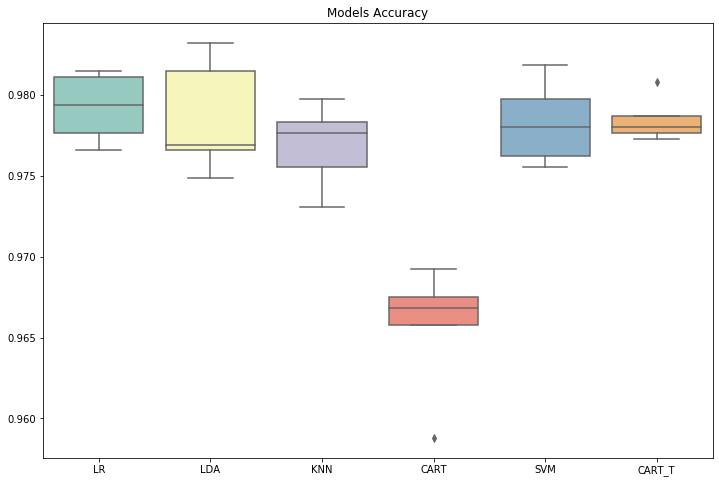

In [16]:
# Merging the results with the old group of model to compare results
new_results = list(np.vstack((results, new_cv)))
names.append('CART_T')
plt.figure(figsize=(12,8))
sns.boxplot(x=names, y=new_results, palette="Set3")
plt.title("Models Accuracy")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.84      0.89       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



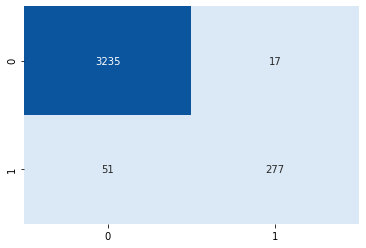

In [18]:
#FINAL MODEL

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lg = LogisticRegression(solver= 'lbfgs')
lg.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = lg.predict(X_test)


# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),cbar=False,annot=True,cmap=cmap,fmt="d")


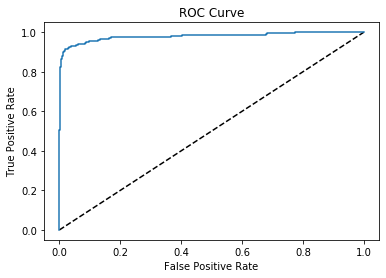

In [19]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(lg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9797057345573456
AUC scores computed using 5-fold cross-validation: [0.97485787 0.9802148  0.97801634 0.98063577 0.98296772]
